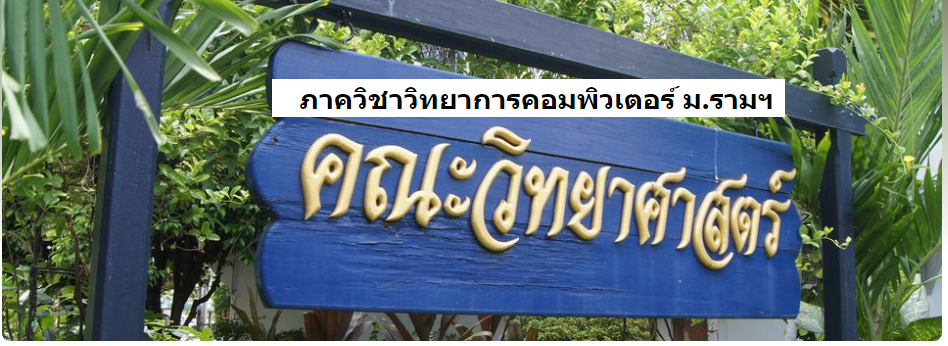

## <span style='color:lightgreen;'>The Power-Law (Gamma) Transformation</span>  
The Power-Law (Gamma) Transformation is a popular method used in image processing for image enhancement, particularly for adjusting the brightness and contrast of an image. This method is particularly useful when dealing with images that are too dark or too bright, or when the contrast needs to be adjusted for better visual perception or for further image processing tasks.

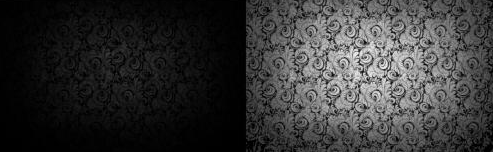

Here's a brief explanation of how it works:

1. **<i><span style='color:lightblue;'> Power-Law Transformation Function:</span> </i>** The core of this method is the power-law transformation function, which is defined as  **<i><span style='color:lightblue;'> s=c⋅(r^γ)</span> </i>** ,  where: **<i>s</i>** is the output pixel value. **<i>r</i>** is the input pixel value. **<i>c</i>** and **<i>γ</i>** are positive constants.

2. **<i><span style='color:lightblue;'>Adjusting Gamma γ</span> </i>**
    - when **<i><span style='color:lightgreen;'> γ<1</span> </i>**,  the transformation maps a narrow range of dark input values into a wider range of output values, lightening the image. It's useful for images that are too dark.

    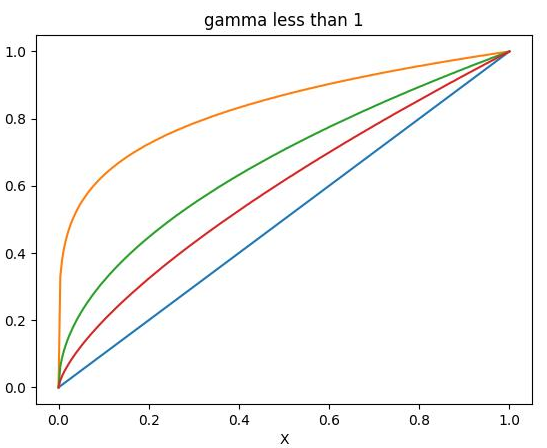
    
    - When  **<i><span style='color:green;'> γ>1</span> </i>**, it does the opposite, mapping a wide range of input values into a narrow range, thereby darkening the image. This is useful for images that are too bright.

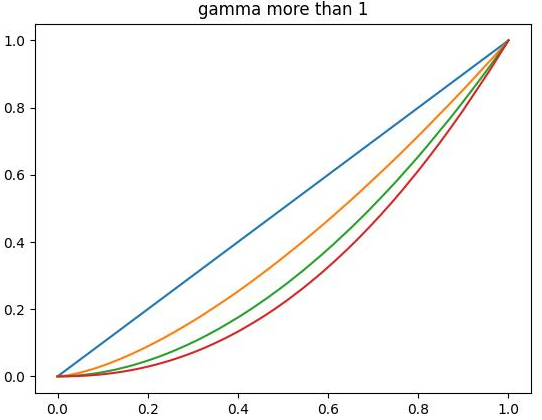

3. **<i><span style='color:lightblue;'>The constant  c</span> </i>** is often chosen to scale the maximum output value to the desired range, such as 255 for an 8-bit grayscale image.

4. **<i><span style='color:lightblue;'>Application:</span> </i>**  This transformation is applied to each pixel in the image. For color images, it can be applied to each color channel independently.

5. **<i><span style='color:lightblue;'>Enhancement Effects:</span> </i>** Preprocessing images for computer vision tasks where contrast normalization is required. The Power-Law (Gamma) Transformation is a simple yet powerful tool in image processing, and it's widely used due to its effectiveness and ease of implementation.

## <span style='color:lightblue;'>Let's start</span>  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:lightblue;'>READ RAW IMAGE AND NORMALIZATION</span>  
<b><span style='color:orange;'>The image normalization</span></b>  is required

In [19]:
gamma = 0.5
c = 255.0
img = cv2.imread("./images/dark2.png", cv2.IMREAD_GRAYSCALE)
img_norm = img.astype(np.float16)
img_norm = img_norm/np.amax(img_norm) 


In [20]:
cv2.imshow("test image", img)
cv2.waitKey()
cv2.destroyAllWindows()

## <span style='color:lightgreen;'>Method I of The Power-Law (Gamma) Transformation</span>  

In [21]:
gamma_img = (img_norm**gamma)*c
gamma_img = gamma_img.astype(np.uint8) 

In [26]:
muls_img = cv2.hconcat([img, gamma_img])
cv2.imwrite('./outs/img2s.png', muls_img.astype(np.uint8))



True

In [27]:
cv2.imshow("test image", muls_img)
cv2.waitKey()
cv2.destroyAllWindows()

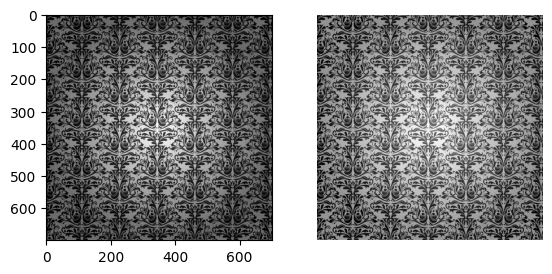

In [23]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
#plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gamma_img, cmap='gray')
plt.axis('off')

plt.show()
#plt.savefig('./outs/fig_gamma.png')

## <span style='color:orange;'>Method II of The Power-Law (Gamma) Transformation</span>  

In [5]:
print(img_norm.shape)

(769, 765)


In [6]:
gam_img = np.zeros_like(img_norm, dtype='float')
row, col = gam_img.shape
print(row,col)

769 765


In [7]:
for i in range(row):
    for j in range(col):
        gam_img[i,j] = c*(img_norm[i,j]**gamma)

gam_img = gam_img.astype(np.uint8) 

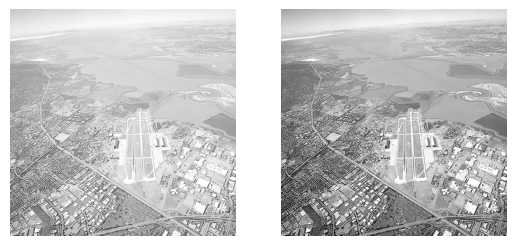

In [8]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gam_img, cmap='gray')
plt.axis('off')

plt.show()

## <span style='color:lightblue;'>Method III of The Power-Law (Gamma) Transformation</span>  

In [9]:
k = np.amax(img)
print(k)

255


In [10]:
table = np.array([ i/255.0 for i in range(256)])
gam_table = c*(table**gamma)
gam_table = gam_table.astype(np.uint8)
print(gam_table)

[  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1
   2   2   2   2   3   3   3   3   4   4   4   5   5   5   6   6   6   7
   7   7   8   8   9   9   9  10  10  11  11  12  12  13  13  14  14  15
  15  16  16  17  17  18  18  19  20  20  21  21  22  22  23  24  24  25
  26  26  27  28  28  29  30  30  31  32  33  33  34  35  36  36  37  38
  39  39  40  41  42  43  43  44  45  46  47  48  49  49  50  51  52  53
  54  55  56  57  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  90
  91  92  93  94  95  96  98  99 100 101 102 104 105 106 107 108 110 111
 112 113 115 116 117 119 120 121 122 124 125 126 128 129 130 132 133 134
 136 137 138 140 141 143 144 145 147 148 150 151 153 154 155 157 158 160
 161 163 164 166 167 169 170 172 173 175 176 178 179 181 182 184 185 187
 189 190 192 193 195 197 198 200 201 203 205 206 208 210 211 213 215 216
 218 220 221 223 225 226 228 230 232 233 235 237 23

In [11]:
gam_img2 = cv2.LUT(img, gam_table)

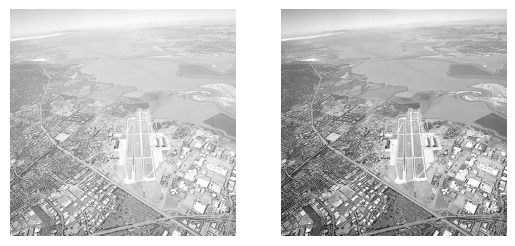

In [12]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gam_img2, cmap='gray')
plt.axis('off')

plt.show()